# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gather DATA">Data Gathering</a></li>
<li><a href="#assess DATA">Data Assessing</a></li>
<li><a href="#clean DATA">Data Cleaning</a></li>
<li><a href="#store DATA">Data Storing</a></li>
<li><a href="#analyze DATA">Data Analyzing</a></li>
</ul>

In [1]:
# Libs 
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

<a id="gather DATA"></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Contains Tweets that include additional information that has already been parsed from the text
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download image-predictions.tsv from a provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# if response = 200 --> requests successful
print(response)

<Response [200]>


In [5]:
with open(os.path.join( url.split('/')[-1]), mode = 'wb') as file : 
        file.write(response.content)

In [6]:
df_image_predictions = pd.read_csv(url.split('/')[-1], delimiter='\t')

In [7]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
# Twitter API for more data (save to local file)
# consumer_key = 'YOUR CONSUMER KEY'
# consumer_secret = 'YOUR CONSUMER SECRET'
# access_token = 'YOUR ACCESS TOKEN'
# access_secret = 'YOUR ACCESS SECRET'


# consumer_key = ""
# consumer_secret = ""
# access_token = ""
# access_secret = ""

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

In [11]:
# # Store data on tweet_json.txt
# with open('tweet_json.txt', 'w') as outfile: 
#     for tweet_id in df_twitter_archive['tweet_id']:
#         try:
#             tweet = api.get_status(tweet_id)
#             # Convert to JSON and write
#             json.dump(tweet._json, outfile)
#             outfile.write("\n")
            
#         except:  # could be the case the tweet was deleted
#             print('ERROR: Error on tweet id {}'.format(tweet_id))
#             e = os.sys.exc_info()[0]

In [12]:
# # Save only certain tweet elements in dataframe
# elements_to_save = ['id', 'favorite_count', 'retweet_count']
# # Later convert list to dataframe
# data = []

# with open('tweet_json.txt', 'r') as readfile: 
#     # Read in JSON line and convert to dict
#     tweet_json = readfile.readline()
    
#     # Read line by line into DataFrame
#     while tweet_json:
#         tweet_dict = json.loads(tweet_json)
#         # Create a smaller dict
#         data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
#         data.append(data_row)
        
#         # Read in JSON line and convert to dict
#         tweet_json = readfile.readline()
        
            
    
# df_tweet_info = pd.DataFrame.from_dict(data)

In [13]:
tweet_json = 'tweet-json.txt'

In [14]:
# Read in the JSON File and save it as a DataFrame
data_list = []

with open(tweet_json, 'r') as json_file:
    line = json_file.readline()
    while line:
        data = json.loads(line)

        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        data_list.append(json_data)

        line = json_file.readline()

extra_archive = pd.DataFrame(data_list, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

In [15]:
extra_archive.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [16]:
extra_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
# Save as csv File 
extra_archive.to_csv('twitter-archive-extra.csv', index = False)

<a id="assess DATA"></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [18]:
# gathered Data

df_ar = pd.read_csv('twitter-archive-enhanced.csv')
df_pred = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
df_ex = pd.read_csv('twitter-archive-extra.csv')

### <font color='Blue'>**Twitter-archive dataset**</font>

In [19]:
# archive Data 
# Overview 
df_ar.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I present to you... Dog Jesus. ...,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a handful of sleepy puppers. All look u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929...,11,10,None,None,None,None,None
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None
2048,671511350426865664,NaN,NaN,2015-12-01 02:09:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Hammond. He's just a wee lil pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671511350...,8,10,Hammond,None,None,None,None
2052,671486386088865792,NaN,NaN,2015-12-01 00:30:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He just saw a spider. 10/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671486386...,10,10,Malcolm,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
493,813202720496779264,NaN,NaN,2016-12-26 02:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813202720...,11,10,None,doggo,None,None,None


In [20]:
# data info
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
# name values
df_ar.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [22]:
# Number of name that have Name == "a "
len (df_ar[df_ar.name == "a"])

55

In [23]:
# all name in Lower Case
Name_low = df_ar.name.str.contains('^[a-z]', regex = True)
df_ar[Name_low].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [24]:
len(df_ar[Name_low].name)

109

Some Names are not an actual names (the,this, a ...) and some are in Lower Case

In [25]:
# null data
df_ar.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
df_ar.expanded_urls.isnull().sum()

59

In [27]:
df_ar[df_ar.expanded_urls.isna()][["tweet_id","text","expanded_urls"]].head()

,tweet_id,text,expanded_urls
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,NaN
64,879674319642796034,@RealKentMurphy 14/10 confirmed,NaN
113,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN
148,863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...,NaN


In [28]:
# are any of the tweet_id with expanded_urls == Nan in the pred Table ? -->no
a = list(df_ar[df_ar.expanded_urls.isna()].tweet_id)

sum(df_pred.tweet_id.isin(a))

0

In [29]:
# are any of the tweet_id with expanded_urls == Nan in the ex Table ? --> yes
sum(df_ex.tweet_id.isin(a))

59

59 missing values in expanded_urls, where They are NOT in the predictions table Regarding the tweet_id 

In [30]:
df_ar[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [31]:
df_ar.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [32]:
df_ar[df_ar.rating_denominator != 10].shape

(23, 17)

In [33]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
df_ar[ (df_ar.rating_denominator != 10) & df_ar.in_reply_to_status_id.isna() & df_ar.retweeted_status_id.isna()][['text', 'tweet_id', 'rating_numerator', 'rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [34]:
df_ar.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [35]:
df_ar[df_ar.rating_numerator >= 17].shape

(26, 17)

In [36]:
# display tweets with numerator >= 17 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
df_ar[ (df_ar.rating_numerator >=17) & (df_ar.rating_denominator == 10) & df_ar.in_reply_to_status_id.isna() & df_ar.retweeted_status_id.isna()][['text', 'tweet_id', 'rating_numerator', 'rating_denominator']]


,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [37]:
# Number of tweets with numerator >= 17 that DO have denominator of 10
print(df_ar[ (df_ar.rating_numerator >=17) & (df_ar.rating_denominator == 10) & df_ar.in_reply_to_status_id.isna() & df_ar.retweeted_status_id.isna()][['text', 'tweet_id', 'rating_numerator', 'rating_denominator']].shape[0])

5


In [38]:
# distribution of the df_ar.source
df_ar.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
df_ar.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [40]:
df_ar[['tweet_id', 'text','rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1472,693942351086120961,This is Kobe. He's a Speckled Rorschach. Reque...,10,10,Kobe,None,None,None,None
1749,679047485189439488,This dog doesn't know how to stairs. Quite tra...,9,10,None,None,None,None,None
1670,682406705142087680,This is Patrick. He's a bigass pupper. 7/10 ht...,7,10,Patrick,None,None,pupper,None
1998,672538107540070400,Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,7,10,Darby,None,None,None,None
1371,702276748847800320,"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",11,10,None,None,None,None,None


In [41]:
# Nummber of doggs thta have not a defined type
len(df_ar[(df_ar.doggo == "None")  & (df_ar.floofer == "None") & (df_ar.pupper == "None") &  (df_ar.puppo == "None")])

1976

### <font color='Blue'>**Twitter-archive Extra dataset**</font>

In [42]:
# Overview about the Dataset
df_ex.sample(7)

,tweet_id,retweet_count,favorite_count
2076,670832455012716544,242,780
868,761672994376806400,33421,55016
423,821522889702862852,2030,8871
1773,678021115718029313,7148,15018
742,780459368902959104,1224,5892
1301,707420581654872064,789,2499
609,797236660651966464,7726,22328


In [43]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [44]:
df_ex.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [45]:
df_ex.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [46]:
df_ar.shape[0], df_ex.shape[0]

(2356, 2354)

In [47]:
# not the same Number of rows --> 2 Messing Values
df_ar.shape[0] == df_ex.shape[0]

False

### <font color='Blue'>**Image-predictions dataset**</font>

In [48]:
df_pred.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
654,682059653698686977,https://pbs.twimg.com/media/CXcpovWWMAAMcfv.jpg,2,jigsaw_puzzle,0.995873,False,Siamese_cat,0.000781,False,pizza,0.000432,False
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False


p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

In [49]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [50]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [51]:
df_pred.p1_dog.value_counts(),df_pred.p2_dog.value_counts(),df_pred.p3_dog.value_counts()

(True     1532
 False     543
 Name: p1_dog, dtype: int64,
 True     1553
 False     522
 Name: p2_dog, dtype: int64,
 True     1499
 False     576
 Name: p3_dog, dtype: int64)

In [52]:
# check how Many rows that don't predict dogs
df_pred[~df_pred.p1_dog & ~df_pred.p2_dog & ~df_pred.p3_dog][['tweet_id', 'p1', 'p1_dog','p2', 'p2_dog', 'p3', 'p3_dog']].sample(5)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
390,673363615379013632,ox,False,warthog,False,bison,False
1093,719704490224398336,home_theater,False,window_shade,False,bathtub,False
736,687102708889812993,fiddler_crab,False,quail,False,rock_crab,False
357,672609152938721280,microwave,False,rotisserie,False,television,False
151,668643542311546881,common_iguana,False,frilled_lizard,False,sandbar,False


In [53]:
len(df_pred[~df_pred.p1_dog & ~df_pred.p2_dog & ~df_pred.p3_dog][['tweet_id', 'p1', 'p1_dog','p2', 'p2_dog', 'p3', 'p3_dog']])

324

In each of the prediction columns, there are over 500 cases where the algorithm did not predict a dog breed from the image. Taken together, there are 324 cases in which none of the three predictions contains a valid dog breed.

In [54]:
Count = 0
for v in df_pred.tweet_id.values:
    for n in df_ar.tweet_id.values:
        if n == v :
            Count += 1
print (Count)            

2075


In [55]:
print(df_pred.tweet_id.count() , ",", df_ar.tweet_id.count())
print(df_ar.tweet_id.count()-df_pred.tweet_id.count())

2075 , 2356
281


281 predicted missing images compared to the number of tweets in the archive.

# Rating Sumarry
### Quality issues
###### df_ar table

1. name is sometimes not an actual name (Invalid names like "a", "the" ...) 

2. Some Names are in Lower Case

3. wrong data types (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)

4. missing some expanded_urls Data

5. incorrect rating_denominator for 23 entries

6. Unreasonably high values in the rating_numerator ( for 1455 entries)

7. 181 retweets that are not needed

8. 78 reply tweets that are not needed

9. The sources can be  divided into 4 Subgroups: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client and TweetDeck.


##### df_pred table

10. p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

11. 281 predicted missing images compared to the number of tweets in the archive.  (only has 2075 entries instead of 2356)

###### df_ex table

12. missing data (only has 2354 entries instead of 2356)


### Tidiness issues

###### df_ar table
1. The 4 columns doggo, floofer, pupper, puppo can be combined in one column named dog_type 

2. The All rating_denominators shoud be always the same (10), so this column is no longer needed

3. Retweet columns not necessary (no investigation of retweets)

###### df_pred table

4. The prediction of the dog breed with the highest confidence level can be combined with the archive table, because the Twitter table contains all the information about the dog in the tweet

<a id="clean DATA"></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [56]:
# Make copies of dataframes to clean 
df_clean_ar = df_ar.copy()
df_clean_pred = df_pred.copy()
df_clean_ex = df_ex.copy()

### name is sometimes not an actual name (Invalid names like "a", "the" ...)

#### Define: 
(NOTE: The dataset contains many non-names, so only names with "a" are fixed for this dataset).

set "a" to "None" if no name was specified, otherwise fix name

#### Code

In [58]:
def replace_names(row):
    # Only try to replace name if it is 'a'
    if row['name'] == 'a':    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

df_clean_ar = df_clean_ar.apply(replace_names, axis=1)

In [59]:
df_clean_ar.name.value_counts()

None          780
Charlie        12
Oliver         11
Cooper         11
Lucy           11
             ... 
Bayley          1
Meatball        1
Storkson        1
Remy            1
Christoper      1
Name: name, Length: 973, dtype: int64

#### Test

In [60]:
# Check if there is no 'a' names
'a' in df_clean_ar['name']

False

### Some Names are in Lower Case

#### Define  
Replace all lowercase words in the name column with Capitalize()

#### Code

In [61]:
df_clean_ar[df_clean_ar.name.str.contains('^[a-z]', regex = True)].name.value_counts().sort_index()

actually        2
all             1
an              7
by              1
getting         2
his             1
incredibly      1
infuriating     1
just            4
life            1
light           1
mad             2
my              1
not             2
officially      1
old             1
one             4
quite           4
space           1
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, dtype: int64

In [62]:
df_clean_ar.name = df_clean_ar.name.str.capitalize()

#### Test

In [63]:
df_clean_ar[df_clean_ar.name.str.contains('^[a-z]', regex = True)].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [64]:
df_clean_ar.name.value_counts()

None          780
Charlie        12
Oliver         11
Cooper         11
Lucy           11
             ... 
Bayley          1
Meatball        1
Storkson        1
Remy            1
Christoper      1
Name: name, Length: 973, dtype: int64

### wrong data types (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)


#### Define  
Change in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id to int64

Change timestamp and retweeted_status_timestamp to datetimes

#### Code

In [65]:
sum(df_clean_ar.in_reply_to_status_id == 0), sum(df_clean_ar.in_reply_to_user_id == 0),sum(df_clean_ar.retweeted_status_id == 0),sum(df_clean_ar.retweeted_status_user_id == 0)

(0, 0, 0, 0)

In [66]:
To_int =["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id"]

for n in To_int:
    df_clean_ar[n] = df_clean_ar[n].fillna(0)
    
# nan to 0 

# df_clean_ar.in_reply_to_status_id = df_clean_ar.in_reply_to_status_id.fillna(0)
# df_clean_ar.in_reply_to_user_id = df_clean_ar.in_reply_to_user_id.fillna(0)
# df_clean_ar.retweeted_status_id = df_clean_ar.retweeted_status_id.fillna(0)
# df_clean_ar.retweeted_status_user_id = df_clean_ar.retweeted_status_user_id.fillna(0)



# To integer

# df_clean_ar.in_reply_to_status_id = df_clean_ar.in_reply_to_status_id.astype(int)
# df_clean_ar.in_reply_to_user_id = df_clean_ar.in_reply_to_user_id.astype(int)
# df_clean_ar.retweeted_status_id = df_clean_ar.retweeted_status_id.astype(int)
# df_clean_ar.retweeted_status_user_id = df_clean_ar.retweeted_status_user_id.astype(int)

for n in To_int:
    df_clean_ar[n] = df_clean_ar[n].astype(np.int64)

# 0 to nan 
    
# df_clean_ar.in_reply_to_status_id = df_clean_ar.in_reply_to_status_id.replace(0, np.nan)
# df_clean_ar.in_reply_to_user_id = df_clean_ar.in_reply_to_user_id.replace(0, np.nan)
# df_clean_ar.retweeted_status_id = df_clean_ar.retweeted_status_id.replace(0, np.nan)
# df_clean_ar.retweeted_status_user_id = df_clean_ar.retweeted_status_user_id.replace(0, np.nan)

for n in To_int:
    df_clean_ar[n] = df_clean_ar[n].replace(0, np.nan)


# TODO: Convert data types to integer but ignore null values (?)
# To datetime
df_clean_ar.timestamp = pd.to_datetime(df_clean_ar.timestamp)
df_clean_ar.retweeted_status_timestamp = pd.to_datetime(df_clean_ar.retweeted_status_timestamp)

#### Test

In [67]:
df_clean_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### missing some expanded_urls Data

#### Define  
Use tweet_id to get expanded_urls

#### Code

In [68]:
# If expanded_urls is null, add by using tweet id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return row


# Save dataframe with missing urls
df_clean_ar = df_clean_ar.apply(add_urls, axis=1)

#### Test

In [69]:
# Check that no empty expanded_urls are existing
df_clean_ar.expanded_urls.isnull().sum()

0

### incorrect rating_denominator for 23 entries

#### Define  
Replace ratings denominator with value 10

#### Code

In [70]:
df_clean_ar.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [71]:
df_clean_ar.rating_denominator.values[df_clean_ar.rating_denominator > 10] = 10

#### Test

In [72]:
df_clean_ar.rating_denominator.value_counts().sort_index()

0        1
2        1
7        1
10    2353
Name: rating_denominator, dtype: int64

### Unreasonably high values in the rating_numerator ( for 1455 entries)

#### Define  
Drop tweets that have rating_numerator >= 20

#### Code

In [73]:
df_clean_ar.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [74]:
df_clean_ar.drop(df_clean_ar.loc[df_clean_ar.rating_numerator >= 20 ].index, inplace=True)

#### Test

In [75]:
df_clean_ar.rating_numerator.value_counts().sort_index()

0       2
1       9
2       9
3      19
4      17
5      37
6      32
7      55
8     102
9     158
10    461
11    464
12    558
13    351
14     54
15      2
17      1
Name: rating_numerator, dtype: int64

###  181 retweets that are not needed

#### Define  
Drop all rows containing retweets

#### Code

In [76]:
df_clean_ar = df_clean_ar[df_clean_ar.retweeted_status_user_id.isna()]

#### Test

In [77]:
df_clean_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2151 non-null   int64              
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2151 non-null   datetime64[ns, UTC]
 4   source                      2151 non-null   object             
 5   text                        2151 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2151 non-null   object             
 10  rating_numerator            2151 non-null   int64           

In [78]:
df_clean_ar.retweeted_status_user_id.isnull().sum()

2151

### 78 reply tweets that are not needed

#### Define  
Drop all rows that are replies

#### Code

In [79]:
df_clean_ar = df_clean_ar[df_clean_ar.in_reply_to_status_id.isna()]

#### Test

In [80]:
df_clean_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2079 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2079 non-null   datetime64[ns, UTC]
 4   source                      2079 non-null   object             
 5   text                        2079 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2079 non-null   object             
 10  rating_numerator            2079 non-null   int64           

In [81]:
df_clean_ar.in_reply_to_status_id.isnull().sum()

2079

### The sources can be divided into 4 Subgroups: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client and TweetDeck.

#### Define  
Replace the source string through the display part itself.

#### Code

In [82]:
df_clean_ar.source = df_clean_ar.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [83]:
df_clean_ar.source.value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

#### Define  
All strings in p1, p2 and p3 will be written in lower case

#### Code

In [84]:
df_clean_pred['p1'] = df_clean_pred['p1'].str.lower()
df_clean_pred['p2'] = df_clean_pred['p2'].str.lower()
df_clean_pred['p3'] = df_clean_pred['p3'].str.lower()

#### Test

In [85]:
df_clean_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### 281 predicted missing images compared to the number of tweets in the archive. (only has 2075 entries instead of 2356)

#### Define  
Build a new data frame by merging data from image predictions with a copy of the Twitter archive if the image prediction tweet is already found in the Twitter archive

#### Code

In [86]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_clean_ar
df2 = df_clean_pred

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [87]:
# If tweet id (from image predictions) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_clean_pred.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in archive
    if tweet_id not in df_clean_ar.tweet_id.values:
        # Check that it also isn't in new df
        if tweet_id in df_clean_final.tweet_id.values:
            print('Paradox! ID#{} in final DF but shouldn\'t be'.format(tweet_id))
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2078
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2079 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2079 non-null   datetime64[ns, UTC]
 4   source                      2079 non-null   object             
 5   text                        2079 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2079 non-null   object             
 10  rating_numerator            2079 non-null   int64           

### missing data (only has 2354 entries instead of 2356)

#### Define  
Merge data from tweet Extra into a final data frame if the tweet from tweet info is already included in the final data frame (Twitter archive).

#### Code

In [88]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_clean_final
df2 = df_clean_ex
df2.rename(columns={'id':'tweet_id'}, inplace=True)

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [89]:
# If tweet id (from tweet info) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_clean_ex.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in new df
    if tweet_id not in df_clean_ar.tweet_id.values:
        # Test if id is also in new df
        if tweet_id in df_clean_final.tweet_id.values:
            print('ID#{} in final DF but shouldn\'t be'.format(tweet_id))
            
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2078
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2079 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2079 non-null   datetime64[ns, UTC]
 4   source                      2079 non-null   object             
 5   text                        2079 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2079 non-null   object             
 10  rating_numerator            2079 non-null   int64           

In [90]:
df_clean_final.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


### The 4 columns doggo, floofer, pupper, puppo can be combined in one column named dog_type

#### Define  
Melt the 4 columns with the dog stages

#### Code

In [91]:
# create new column named dog_stage where it contain all 4 columns
df_clean_final['dog_stage'] =df_clean_final[
    ['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)

In [92]:
# Drop all 4 columns
df_clean_final.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

In [93]:
# replace 4 None with " " Otherwise to available dog_stage
df_clean_final = df_clean_final.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

In [94]:
# replace " " with Nan
df_clean_final = df_clean_final.replace(regex=r'', value= np.nan)

#### Test

In [95]:
df_clean_final.dog_stage.value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### The All rating_denominators shoud be always the same (10), so this column is no longer needed

#### Define  
Delete the rating_denominator column

#### Code

In [96]:
df_clean_final.drop(['rating_denominator'], axis = 1, inplace = True)
df_clean_final.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

#### Test

In [97]:
df_clean_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating', 'name',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'dog_stage'],
      dtype='object')

### Retweet columns not necessary (no investigation of retweets)

#### Define  
Remove retweet columns from our final data frame

#### Code

In [98]:
# Drop all columns that relate to 
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_clean_final = df_clean_final.drop(retweet_cols, axis=1)

#### Test

In [99]:
df_clean_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating', 'name', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

### The prediction of the dog breed with the highest confidence level can be combined with the archive table, because the Twitter table contains all the information about the dog in the tweet

#### Define  
Combine the best prediction of the dog breed and the associated confidence level with the archive table

#### Code

In [100]:
# Make copies of df_clean_final dataframe 
df_clean_FINALE = df_clean_final.copy()

In [101]:
# df_clean_pred Culumns
df_clean_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [102]:
# all df_clean_pred Culumns except 'tweet_id' should be droped
cols = df_clean_pred.columns[1:]
df_clean_FINALE = df_clean_FINALE.drop(cols, axis=1)

In [103]:
# df_clean_FINALE without df_clean_pred rows
df_clean_FINALE.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating', 'name', 'retweet_count',
       'favorite_count', 'dog_stage'],
      dtype='object')

In [104]:
# the df_clean_pred Culumns should be worked On
df_clean_pred_per = df_clean_final[df_clean_pred.columns]

In [105]:
# setup the conditions for selection
conditions = [(df_clean_pred_per['p1_dog'] == True),
              (df_clean_pred_per['p2_dog'] == True),
              (df_clean_pred_per['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [df_clean_pred_per['p1'], 
                 df_clean_pred_per['p2'],
                 df_clean_pred_per['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [df_clean_pred_per['p1_conf'], 
                      df_clean_pred_per['p2_conf'], 
                      df_clean_pred_per['p3_conf']]

# select the predicted breed based on the first successful condition
df_clean_pred_per['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
df_clean_pred_per['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

C:\Users\Abderrahmen Mansour\AppData\Local\Temp\ipykernel_18632\3938468908.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_pred_per['breed'] = np.select(conditions, choices_breed,
C:\Users\Abderrahmen Mansour\AppData\Local\Temp\ipykernel_18632\3938468908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_pred_per['confidence'] = np.select(conditions, choices_confidence,


In [106]:
# merge the breed and confidence columns to archive
Cols = ['tweet_id', 'breed', 'confidence']
df_clean_FINALE = pd.merge(df_clean_FINALE, df_clean_pred_per[Cols],
                         on = 'tweet_id', how = 'inner')

In [107]:
# change data type for the confidence interval to a rounded, whole integer (%)
df_clean_FINALE.confidence = (df_clean_FINALE.confidence * 100).astype(np.int64)

#### Test

In [108]:
df_clean_FINALE.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating,name,retweet_count,favorite_count,dog_stage,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,8853,39467,NaN,none,0


In [109]:
df_clean_FINALE.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating,retweet_count,favorite_count,confidence
count,2.079000e+03,0.0,0.0,2079.000000,2079.000000,2079.000000,2079.000000
mean,7.366465e+17,NaN,NaN,10.595960,2849.399230,9010.446849,43.333814
std,6.724943e+16,NaN,NaN,2.168615,4726.419407,12241.122799,34.586074
min,6.660209e+17,NaN,NaN,0.000000,16.000000,81.000000,0.000000
25%,6.766970e+17,NaN,NaN,10.000000,642.000000,2042.500000,6.000000
50%,7.095662e+17,NaN,NaN,11.000000,1403.000000,4204.000000,42.000000
75%,7.880951e+17,NaN,NaN,12.000000,3295.500000,11468.000000,75.000000
max,8.924206e+17,NaN,NaN,14.000000,79515.000000,132810.000000,99.000000


In [110]:
df_clean_FINALE.confidence.value_counts()

0     455
99     61
98     39
97     31
95     27
     ... 
63      9
68      8
23      7
64      7
49      7
Name: confidence, Length: 100, dtype: int64

<a id="store DATA"></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [111]:
df_clean_FINALE.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating,name,retweet_count,favorite_count,dog_stage,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,8853,39467,NaN,none,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,6514,33819,NaN,chihuahua,32
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,4328,25461,NaN,chihuahua,71


In [112]:
# # Store data on twitter_archive_master.csv
df_clean_FINALE.to_csv('twitter_archive_master.csv', index = False)

In [113]:
df_finale = pd.read_csv('twitter_archive_master.csv')

<a id="analyze DATA"></a>
## Analyzing and Visualizing Data

### Insights:

* Favorites and retweets analysis
* most common dog breeds
* Distribution of Ratings
* Top ranked dog(s)


### Visualization

In [114]:
df_finale[['retweet_count' , 'favorite_count']].describe()

,retweet_count,favorite_count
count,2079.000000,2079.000000
mean,2849.399230,9010.446849
std,4726.419407,12241.122799
min,16.000000,81.000000
25%,642.000000,2042.500000
50%,1403.000000,4204.000000
75%,3295.500000,11468.000000
max,79515.000000,132810.000000


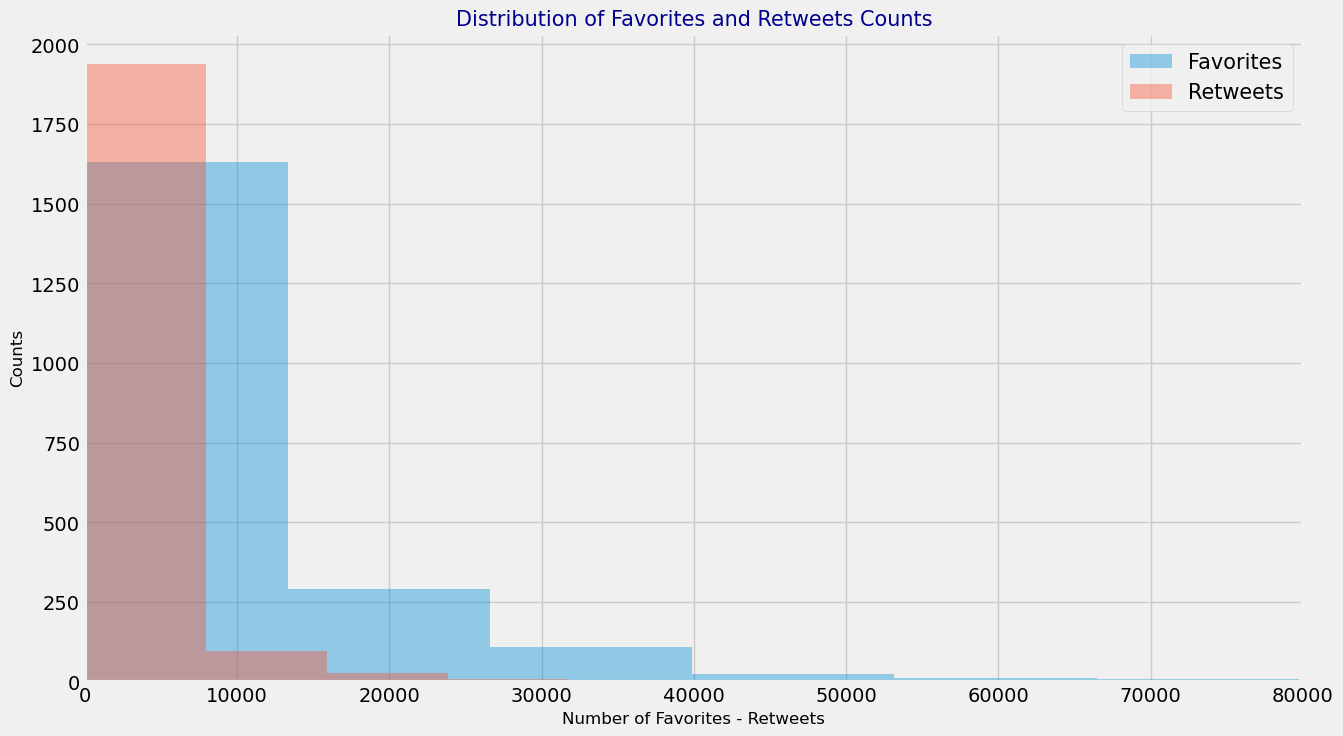

In [116]:
plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')

plt.hist(df_finale.favorite_count, alpha=.4, label='Favorites')
plt.hist(df_finale.retweet_count, alpha=.4, label='Retweets')

plt.title('Distribution of Favorites and Retweets Counts', color='darkblue', fontsize=15)
plt.xlabel('Number of Favorites - Retweets', fontsize=12)
plt.ylabel('Counts', fontsize=12)

plt.xlim(-1, 80000)

plt.legend(prop={'size': 15})
folder_name = 'img'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
plt.savefig('.\img\Favs_retweets_counts')

plt.show()

The distribution of the number of favorites and retweets follows the same pattern.

#### most common dog breeds

In [117]:
df_finale.shape

(2079, 14)

In [118]:
df2 = df_finale['breed'].value_counts()

In [447]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


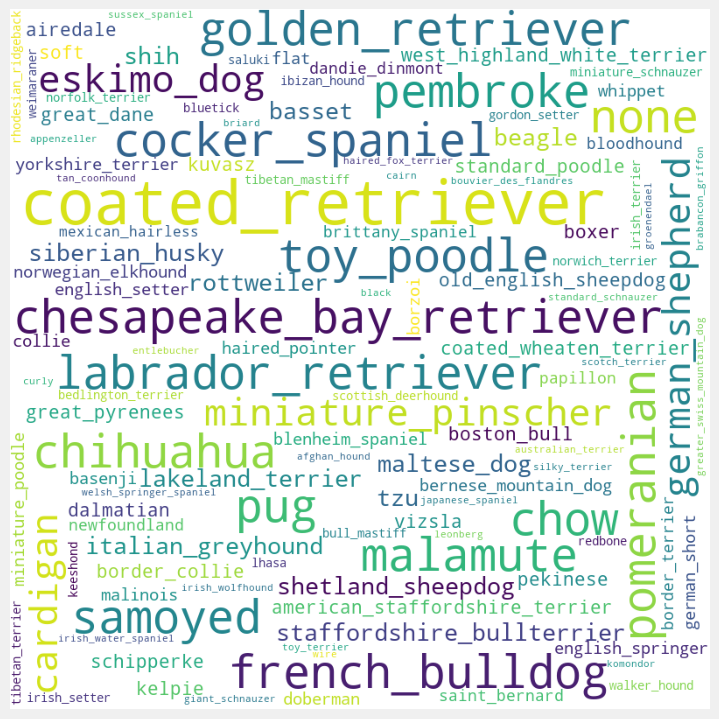

In [119]:
# create a wordcloud to find out the best rated movie genre
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df2.index:
    
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('.\img\most_common_dog_breeds') 
plt.show()


From the word cloud it appears that **Golden_Retriever**, **Labrador_Retriever**, **Pembroke**, **toy Poodle** and **Chihuahua** are the most common dog breeds

#### Distribution of Ratings

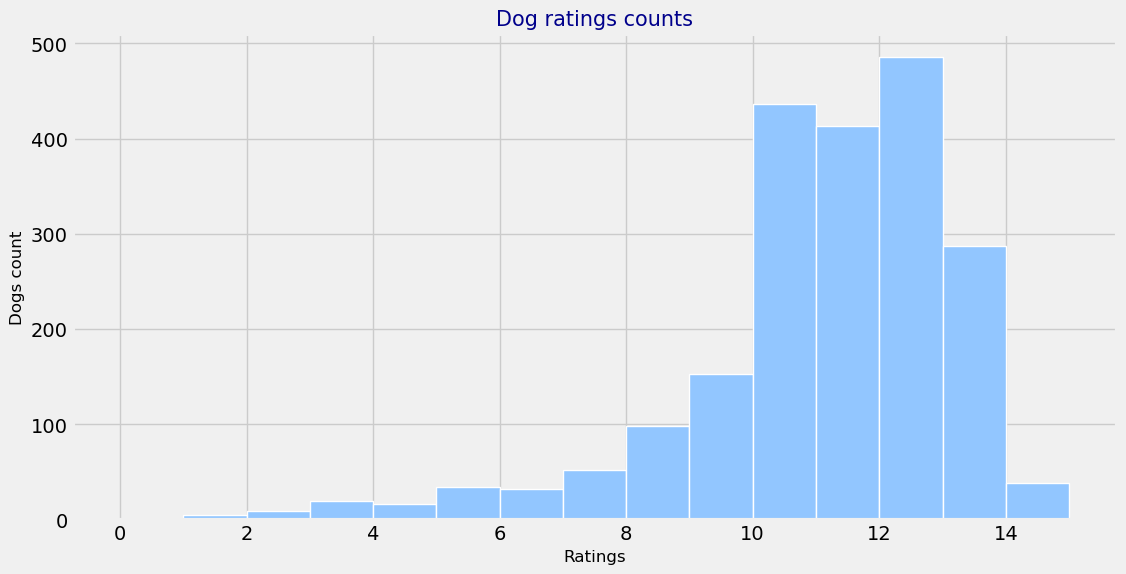

In [120]:
plt.figure(figsize = (12, 6))
plt.style.use('seaborn-pastel')

bins = np.arange(0, 16, 1)
plt.hist(x = df_finale.rating, linewidth=1, edgecolor='white', bins=bins)

plt.title('Dog ratings counts', color='darkblue', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Dogs count', fontsize=12)

# folder_name = 'img'
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)

plt.savefig('.\img\Dogs_ratings_counts')
plt.show()

The distribution of the ratings is very slanted towards the left. The descriptive statistics above show thatober 70% of all ratings are between 10 and 14 inclusive (the IQR is between 10 and 12).

#### Top ranked dog(s)

In [121]:
df_finale.groupby(['dog_stage']).rating.mean().sort_values(ascending=False)

dog_stage
doggo, puppo      13.000000
puppo             12.000000
floofer           11.888889
doggo             11.847222
doggo, pupper     11.111111
doggo, floofer    11.000000
pupper            10.731818
Name: rating, dtype: float64

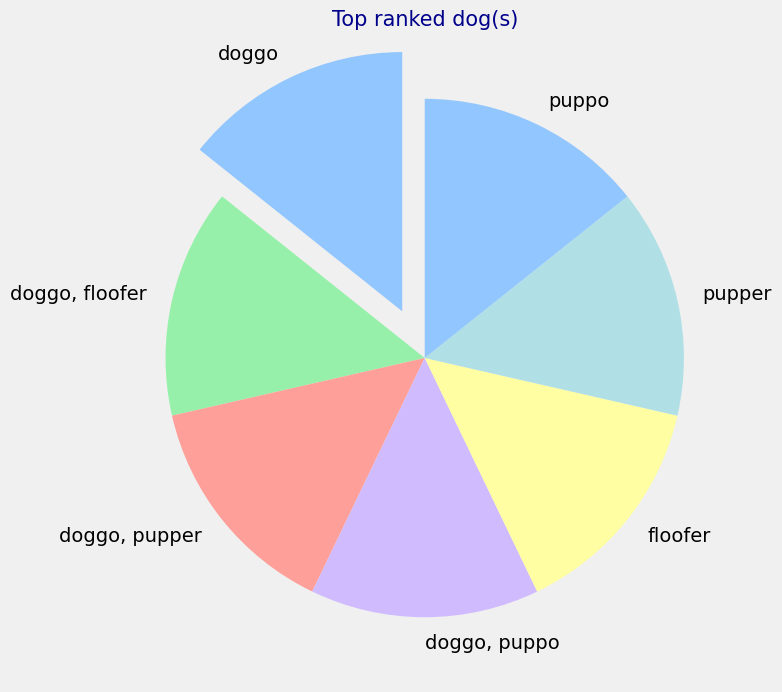

In [122]:
plt.figure(figsize = (12, 8))
plt.style.use('seaborn-pastel')
myexplode = [0.2, 0, 0, 0,0,0,0]

plt.pie(x = df_finale.groupby(['dog_stage']).rating.mean().value_counts(),labels = df_finale.groupby(['dog_stage']).rating.mean().index,startangle = 90,explode = myexplode )

plt.title('Top ranked dog(s)', color='darkblue', fontsize=15)


plt.savefig('.\img\Top_ranked_Dog')
plt.show()

**doggo** & **puppo** are the most rated dog stages